In [1]:
import numpy as np 
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
digit=load_digits()
print(f"Data Shape:{digit.data.shape}")
print(f"target Shape:{digit.target.shape}")

Data Shape:(1797, 64)
target Shape:(1797,)


In [36]:
features=pd.DataFrame(digit.data)
target=digit.target
features.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [16]:
# Mean centering 

for col in features.columns:
    features[col]= features[col]- np.mean(features[col])



In [18]:
# Computing Covariance Matrix 

n=features.shape[0]

Cov_matrix= (1/(n-1))*(features.T@features)

Cov_matrix.shape

(64, 64)

In [ ]:
# Computing Eigen value and eigen vectors

eigenValues , eigenVectors =np.linalg.eig(Cov_matrix)


In [28]:
# Picking top K Eigen value and their corresponding eigen vectors

k=3

sorted_indices=np.argsort(eigenValues)[::-1] # sorting in descending order

topk_indices=sorted_indices[:k]

topk_eigenvalues=eigenValues[topk_indices]
topk_eigenvectors=eigenVectors[:,topk_indices] # 64 x 64 matrix



print(f"Top {k} eigen values: {topk_eigenvalues}")

Top 3 eigen values: [179.0069301  163.71774688 141.78843909]


In [33]:
# Transforming the features 

transformed_features=features@topk_eigenvectors

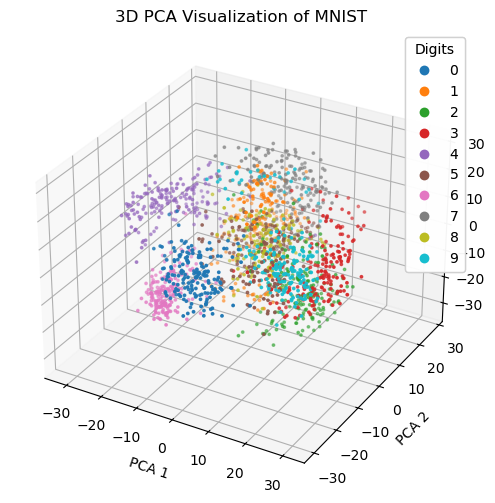

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Get 3D coordinates
X, Y, Z = transformed_features.iloc[:,0], transformed_features.iloc[:,1], transformed_features.iloc[:,2]

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Use color to represent digits (0–9)
scatter = ax.scatter(X, Y, Z, c=target, cmap='tab10', s=3)

# Add color legend
legend = ax.legend(*scatter.legend_elements(), title="Digits")
ax.add_artist(legend)

# Labels
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D PCA Visualization of MNIST")

plt.show()
